# Richter's Predictor: Modeling Earthquake Damage

Según los aspectos de la ubicación y construcción de los edificios, su objetivo es predecir el nivel de daño a los edificios causado por el terremoto de Gorkha de 2015 en Nepal.
Esta es una competencia de práctica de nivel intermedio. Los datos fueron recopilados a través de encuestas realizadas Laboratorios de vida de Katmandú(https://kathmandulivinglabs.org/) y el Oficina Central de Estadística(https://cbs.gov.np/), que trabaja bajo la Secretaría de la Comisión Nacional de Planificación de Nepal. Esta encuesta es uno de los conjuntos de datos posteriores al desastre más grandes jamás recopilados, que contiene información valiosa sobre los impactos del terremoto, las condiciones del hogar y las estadísticas socio-económico-demográficas.

## Resumen
En esta competición vamos a intentar predecir, que tipo de daños a sufrido un edificio en un terremoto. En este caso es un problema de clacificacíon, ya que tenemos tres grados de daño:

* 1 representa bajo daño
* 2 representa una cantidad media de daño
* 3 representa una destrucción casi completa

En este problema contaremos con diversas características como tipos de material que han utilizado para hacer los edificios o si dicho edificio tiene algún uso en particular ya sea cómo oficina de correo, comisarioa de policía etc

## Características

El conjunto de datos consiste principalmente en información sobre la estructura de los edificios y su propiedad legal. Cada fila en el conjunto de datos representa un edificio específico en la región que fue golpeado por el terremoto de Gorkha.

Hay 39 columnas en este conjunto de datos, donde el (building_id) columna es un identificador único y aleatorio. Las 38 características restantes se describen en la sección a continuación. Las variables categóricas han sido caracteres ascii aleatorios ofuscados en minúsculas. La apariencia del mismo carácter en columnas distintas hace no implica el mismo valor original.

## Descripción

* geo_level_1_id, geo_level_2_id, geo_level_3_id ( tipo: int ): región geográfica en la que existe el edificio, desde el nivel 1 ( más grande ) hasta la subregión más específica ( nivel 3 ). Valores posibles: nivel 1: 0-30, nivel 2: 0-1427, nivel 3: 0-12567.
* count_floors_pre_eq( tipo: int ): número de pisos en el edificio antes del terremoto.
* age( tipo: int ): edad del edificio en años.
* area_percentage( tipo: int ): área normalizada de la huella del edificio.
* height_percentage( tipo: int ): altura normalizada de la huella del edificio.
* land_surface_condition( tipo: categórico ): estado de la superficie del terreno donde se construyó el edificio. Valores posibles: n, o, t.
* foundation_type( tipo: categórico ): tipo de base utilizada durante la construcción. Valores posibles: h, i, r, u, w.
* roof_type( tipo: categórico ): tipo de techo utilizado durante la construcción. Valores posibles: n, q, x.
* ground_floor_type( tipo: categórico ): tipo de planta baja. Valores posibles: f, m, v, x, z.
* other_floor_type( tipo: categórico ): tipo de construcciones utilizadas en pisos superiores a los ( excepto del techo ). Valores posibles: j, q, s, x.
* position( tipo: categórico ): posición del edificio. Valores posibles: j, o, s, t.
* plan_configuration( tipo: categórico ): configuración del plan de construcción. Valores posibles: a, c, d, f, m, n, o, q, s, u.
* has_superstructure_adobe_mud( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de Adobe / Mud.
* has_superstructure_mud_mortar_stone( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de mortero de barro - piedra.
* has_superstructure_stone_flag( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de piedra.
* has_superstructure_cement_mortar_stone( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de mortero de cemento - piedra.
* has_superstructure_mud_mortar_brick( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de mortero de barro - ladrillo.
* has_superstructure_cement_mortar_brick( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de mortero de cemento - ladrillo.
* has_superstructure_timber( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de madera.
* has_superstructure_bamboo( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de bambú.
* has_superstructure_rc_non_engineered( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de hormigón armado no diseñado.
* has_superstructure_rc_engineered( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de hormigón armado diseñado.
* has_superstructure_other( tipo: binario ): variable de bandera que indica si la superestructura estaba hecha de cualquier otro material.
* legal_ownership_status( tipo: categórico ): estado de propiedad legal del terreno donde se construyó el edificio. Valores posibles: a, r, v, w.
* count_families ( tipo: int ): número de familias que viven en el edificio.
* has_secondary_use( tipo: binario ): variable de bandera que indica si el edificio se utilizó para algún propósito secundario.
* has_secondary_use_agriculture( tipo: binario ): variable de bandera que indica si el edificio se utilizó con fines agrícolas.
* has_secondary_use_hotel( tipo: binario ): variable de bandera que indica si el edificio se utilizó como hotel.
* has_secondary_use_rental( tipo: binario ): variable de bandera que indica si el edificio se utilizó con fines de alquiler.
* has_secondary_use_institution( tipo: binario ): variable de bandera que indica si el edificio se utilizó como ubicación de cualquier institución.
* has_secondary_use_school( tipo: binario ): variable de bandera que indica si el edificio se utilizó como escuela.
* has_secondary_use_industry( tipo: binario ): variable de bandera que indica si el edificio se utilizó con fines industriales.
* has_secondary_use_health_post( tipo: binario ): variable de bandera que indica si el edificio se utilizó como puesto de salud.
* has_secondary_use_gov_office( tipo: binario ): variable de bandera que indica si el edificio se utilizó para una oficina gubernamental.
* has_secondary_use_use_police( tipo: binario ): variable de bandera que indica si el edificio se utilizó como estación de policía.
* has_secondary_use_other( tipo: binario ): variable de bandera que indica si el edificio se utilizó secundariamente para otros fines.

# Importación de librerias y trabajo de datos

Realizamos la importación de las librerias que vamos a utilizar tales como pandas para la limpieza de datos o seaborn y matplotlib para replecentar graficas

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from lazypredict.Supervised import LazyClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

Este código es para configurar el crecimiento de memoria de una tarjeta gráfica (GPU) en TensorFlow. Primero, se lista todas las GPUs físicas disponibles en el sistema. Luego, se establece la opción de crecimiento de memoria para la primera GPU disponible.

In [19]:
physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Importamos los csv que vamos a trabjar

### Nota
* submission_format.csv = ejemplo de fichero a subir
* train_labels.csv = resultado (Y)
* train_values.csv = caracteristicas (X)
* test_values.csv = para hacer el predict con el modelo entrenado

In [20]:
test_value = pd.read_csv("csv/test_values.csv")
train_value = pd.read_csv("csv/train_values.csv")
train_label = pd.read_csv("csv/train_labels.csv")
train_value

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


## test_value

In [21]:
test_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

## train_label

Vamos a familiarizarnos con los datos y vamos a ver que criterio podemos elegir a la hora de seleccionar una determinada cantidad de datos para realizar el entrenamiento.

In [22]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


Hemos visto que hay un error y es que en la columna de los label hay un espacio.

In [23]:
# modificamos el nombre de la columna
train_label.rename(columns={'building_id ': 'building_id'}, inplace=True)
train_label.columns

Index(['building_id', 'damage_grade'], dtype='object')

## Tranbajando con los datos
Vamos a familiarizarnos con los datos y ver que podemos aprender de ellos y de que forma podemos realizar una simplificación de ellos.

In [24]:
# saber número total de etiquetas repetidas
counts = train_label['damage_grade'].value_counts()
counts

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

Comprobar que los valores mas repetivos son del tipo 2 (cantidad media de daño) 

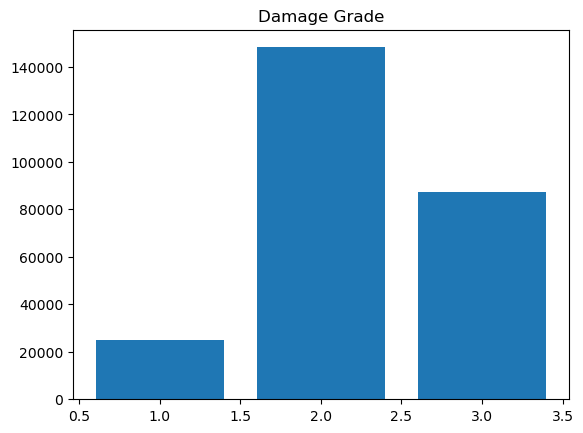

In [25]:
# mostramos en una gráfica los resultados con Matplotlib
plt.bar(counts.index, counts.values)
plt.title('Damage Grade')
plt.show()

## train_value

In [26]:
train_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [27]:
train_value.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

# Criterio de elección de datos para entrenar el modelo.
Una vez que nos hemos familiarizado con los datos, vamos a seleccionar varias pruebas de elección de datos nos vamos a quedar para entrenar los modelos.

In [28]:
df_pp = pd.merge(train_label, train_value, on='building_id', how='left')
df_pp

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,...,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,...,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,...,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,...,0,0,0,0,0,0,0,0,0,0


## Criterio 1

Vamos a coger el 5% de cada uno de los datos correspondientes a las 3 opciones pocibles, es decir el 5% de 1, 5% de 2 y 5% de 3 los datos del DataFrame, de esta manera optendremos un "df" con menos nuero de filas que tiene las mismas condiciones que el original.
El "damage_grade" es la coluna de las etiquetas y se la hemos añadido a al "df" de entrenamiento para poder obtener las filas resultantes descritas anteriormente.

In [29]:
procentajes = [0.05,0.05,0.05] 

# crear un diccionario con los dataframes resultantes
df_dict = {}

for i, dg in enumerate([1, 2, 3]):
    df_dict[dg] = df_pp.groupby('damage_grade').get_group(dg).sample(frac=procentajes[i])
    
df_final = pd.concat(df_dict.values(), axis=0)

In [30]:
df_final

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
92856,93932,1,21,1062,223,2,50,4,5,t,...,0,0,0,0,0,0,0,0,0,0
50148,108125,1,20,508,10459,2,5,7,7,t,...,0,0,0,0,0,0,0,0,0,0
2849,201101,1,26,1222,7307,1,0,17,3,n,...,0,0,0,0,0,0,0,0,0,0
36621,742998,1,20,729,1441,2,15,10,5,t,...,0,0,0,0,0,0,0,0,0,0
111397,174096,1,26,1023,3233,2,10,15,5,t,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196195,942702,3,7,255,11900,2,20,14,5,t,...,0,0,0,0,0,0,0,0,0,0
151479,216899,3,27,1394,7260,3,80,13,9,t,...,0,0,0,0,0,0,0,0,0,0
210595,789767,3,10,1174,8199,2,15,5,6,t,...,0,0,0,0,0,0,0,0,0,0
248801,588996,3,9,445,203,1,20,2,3,t,...,0,0,0,0,0,0,0,0,0,0


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Criterio 2

En este caso vamos a seguir trabajando con los datos de columna "damage_grade" pero vamos a cambiar los porcentajes.
Los porcentajes en este caso van a cambiar y seran:
* 0.09 para los de damage_grade 1
* 0.56 para los de damage_grade 2
* 0.33 para los de damage_grade 3
### ¿Por que estos porcentajes?
A la hora de hacer la puesta en conjunto un compañero detecto que, si subíamos todos los datos de los laves a 1, 2 y 3 obtenemos ciertos porcentajes, que a la hora de verlos vemos que en parecidos al dataframe original en cuanto al volumen de de datos que hay de ese tipo.

In [31]:
procentajes = [0.09,0.56,0.33] 

# crear un diccionario con los dataframes resultantes
df_dict = {}

for i, dg in enumerate([1, 2, 3]):
    df_dict[dg] = df_pp.groupby('damage_grade').get_group(dg).sample(frac=procentajes[i])
    
df_cri_2 = pd.concat(df_dict.values(), axis=0)

--------------------------

Finalmente comparando los dos vemos que el 2º caso se nos queda un df bastante grande, a sique vamos a quedarnos con el caso 1º que se nos queda un número de filas de 78.180.

## Transformación de datos a tipo numérico para preparar el df para entrenar
En este punto vamos a coger todas las columnas que no son de tipo numérico para poder trabajar con ellas y darles un valor numérico a cada valor alfabético dado.

* legal_ownership_status( tipo: categórico ): estado de propiedad legal del terreno donde se construyó el edificio. Valores posibles: a = 1, r = 2, v = 3, w = 4.
* land_surface_condition( tipo: categórico ): estado de la superficie del terreno donde se construyó el edificio. Valores posibles: n = 1, o = 2, t = 3.
* foundation_type( tipo: categórico ): tipo de base utilizada durante la construcción. Valores posibles: h = 1, i = 2, r = 3, u = 4, w = 5.
* roof_type( tipo: categórico ): tipo de techo utilizado durante la construcción. Valores posibles: n = 1, q = 2, x =3.
* ground_floor_type( tipo: categórico ): tipo de planta baja. Valores posibles: f = 1, m = 2, v = 3, x = 4, z = 5.
* other_floor_type( tipo: categórico ): tipo de construcciones utilizadas en pisos superiores a los ( excepto del techo ). Valores posibles: j = 1, q = 2, s = 3, x = 4.
* position( tipo: categórico ): posición del edificio. Valores posibles: j = 1, o = 2, s = 3, t = 4.
* plan_configuration( tipo: categórico ): configuración del plan de construcción. Valores posibles: a = 0, c = 1, d = 2, f = 3, m = 4, n = 5, o = 6, q = 7, s = 8, u = 9.

He tomado la decisión de eliminar las columnas de tipo de uso, dado que no el tipo de uso que se le pueda a dar a un edificio no es relevante si tiene o no daños en un terremoto.
Si un edificio no se derrumba es en cuestión a la estructura no al uso de la misma.

In [32]:
# vamos a signar un valor numerico a cada letra de cada columna
df_final['legal_ownership_status'].replace(['a','r','v','w'], [1,2,3,4], inplace=True)
df_final['land_surface_condition'].replace(['n','o','t'],[1,2,3], inplace=True)
df_final['foundation_type'].replace(['h','i','r','u','w'],[1,2,3,4,5], inplace=True)
df_final['roof_type'].replace(['n','q','x'],[1,2,3], inplace=True)
df_final['ground_floor_type'].replace(['f','m','v','x','z'],[1,2,3,4,5], inplace=True)
df_final['other_floor_type'].replace(['j','q','s','x'],[1,2,3,4], inplace=True)
df_final['position'].replace(['j','o','s','t'],[1,2,3,4], inplace=True)
df_final['plan_configuration'].replace(['a','c','d','f','m','n','o','q','s','u'],[0,1,2,3,4,5,6,7,8,9], inplace=True)

# # eliminamos las columnas que no queremos
# df_final = df_final.drop(['has_secondary_use_agriculture', 'has_secondary_use_hotel',
#        'has_secondary_use_rental', 'has_secondary_use_institution',
#        'has_secondary_use_school', 'has_secondary_use_industry',
#        'has_secondary_use_health_post', 'has_secondary_use_gov_office',
#        'has_secondary_use_use_police', 'has_secondary_use_other'], axis=1)

De la matriz de correlación podemos sacar algunos conclusiones, una de ellas es que tenemos una relevancia muy alta con respecto a la altura del edificio y a la base. Esto es proporcinal, ya que cuanto más alto un edificio la base más grande tiene que ser para poder aguantarlo. Otra relevancia que podemos destacar en el material con el que se han construido las casa y destaca el material 'bamboo', puede ser que dado que es flexible, pero tiene una alta resistencia permita absorber las vibraciones del terremoto.

<Axes: >

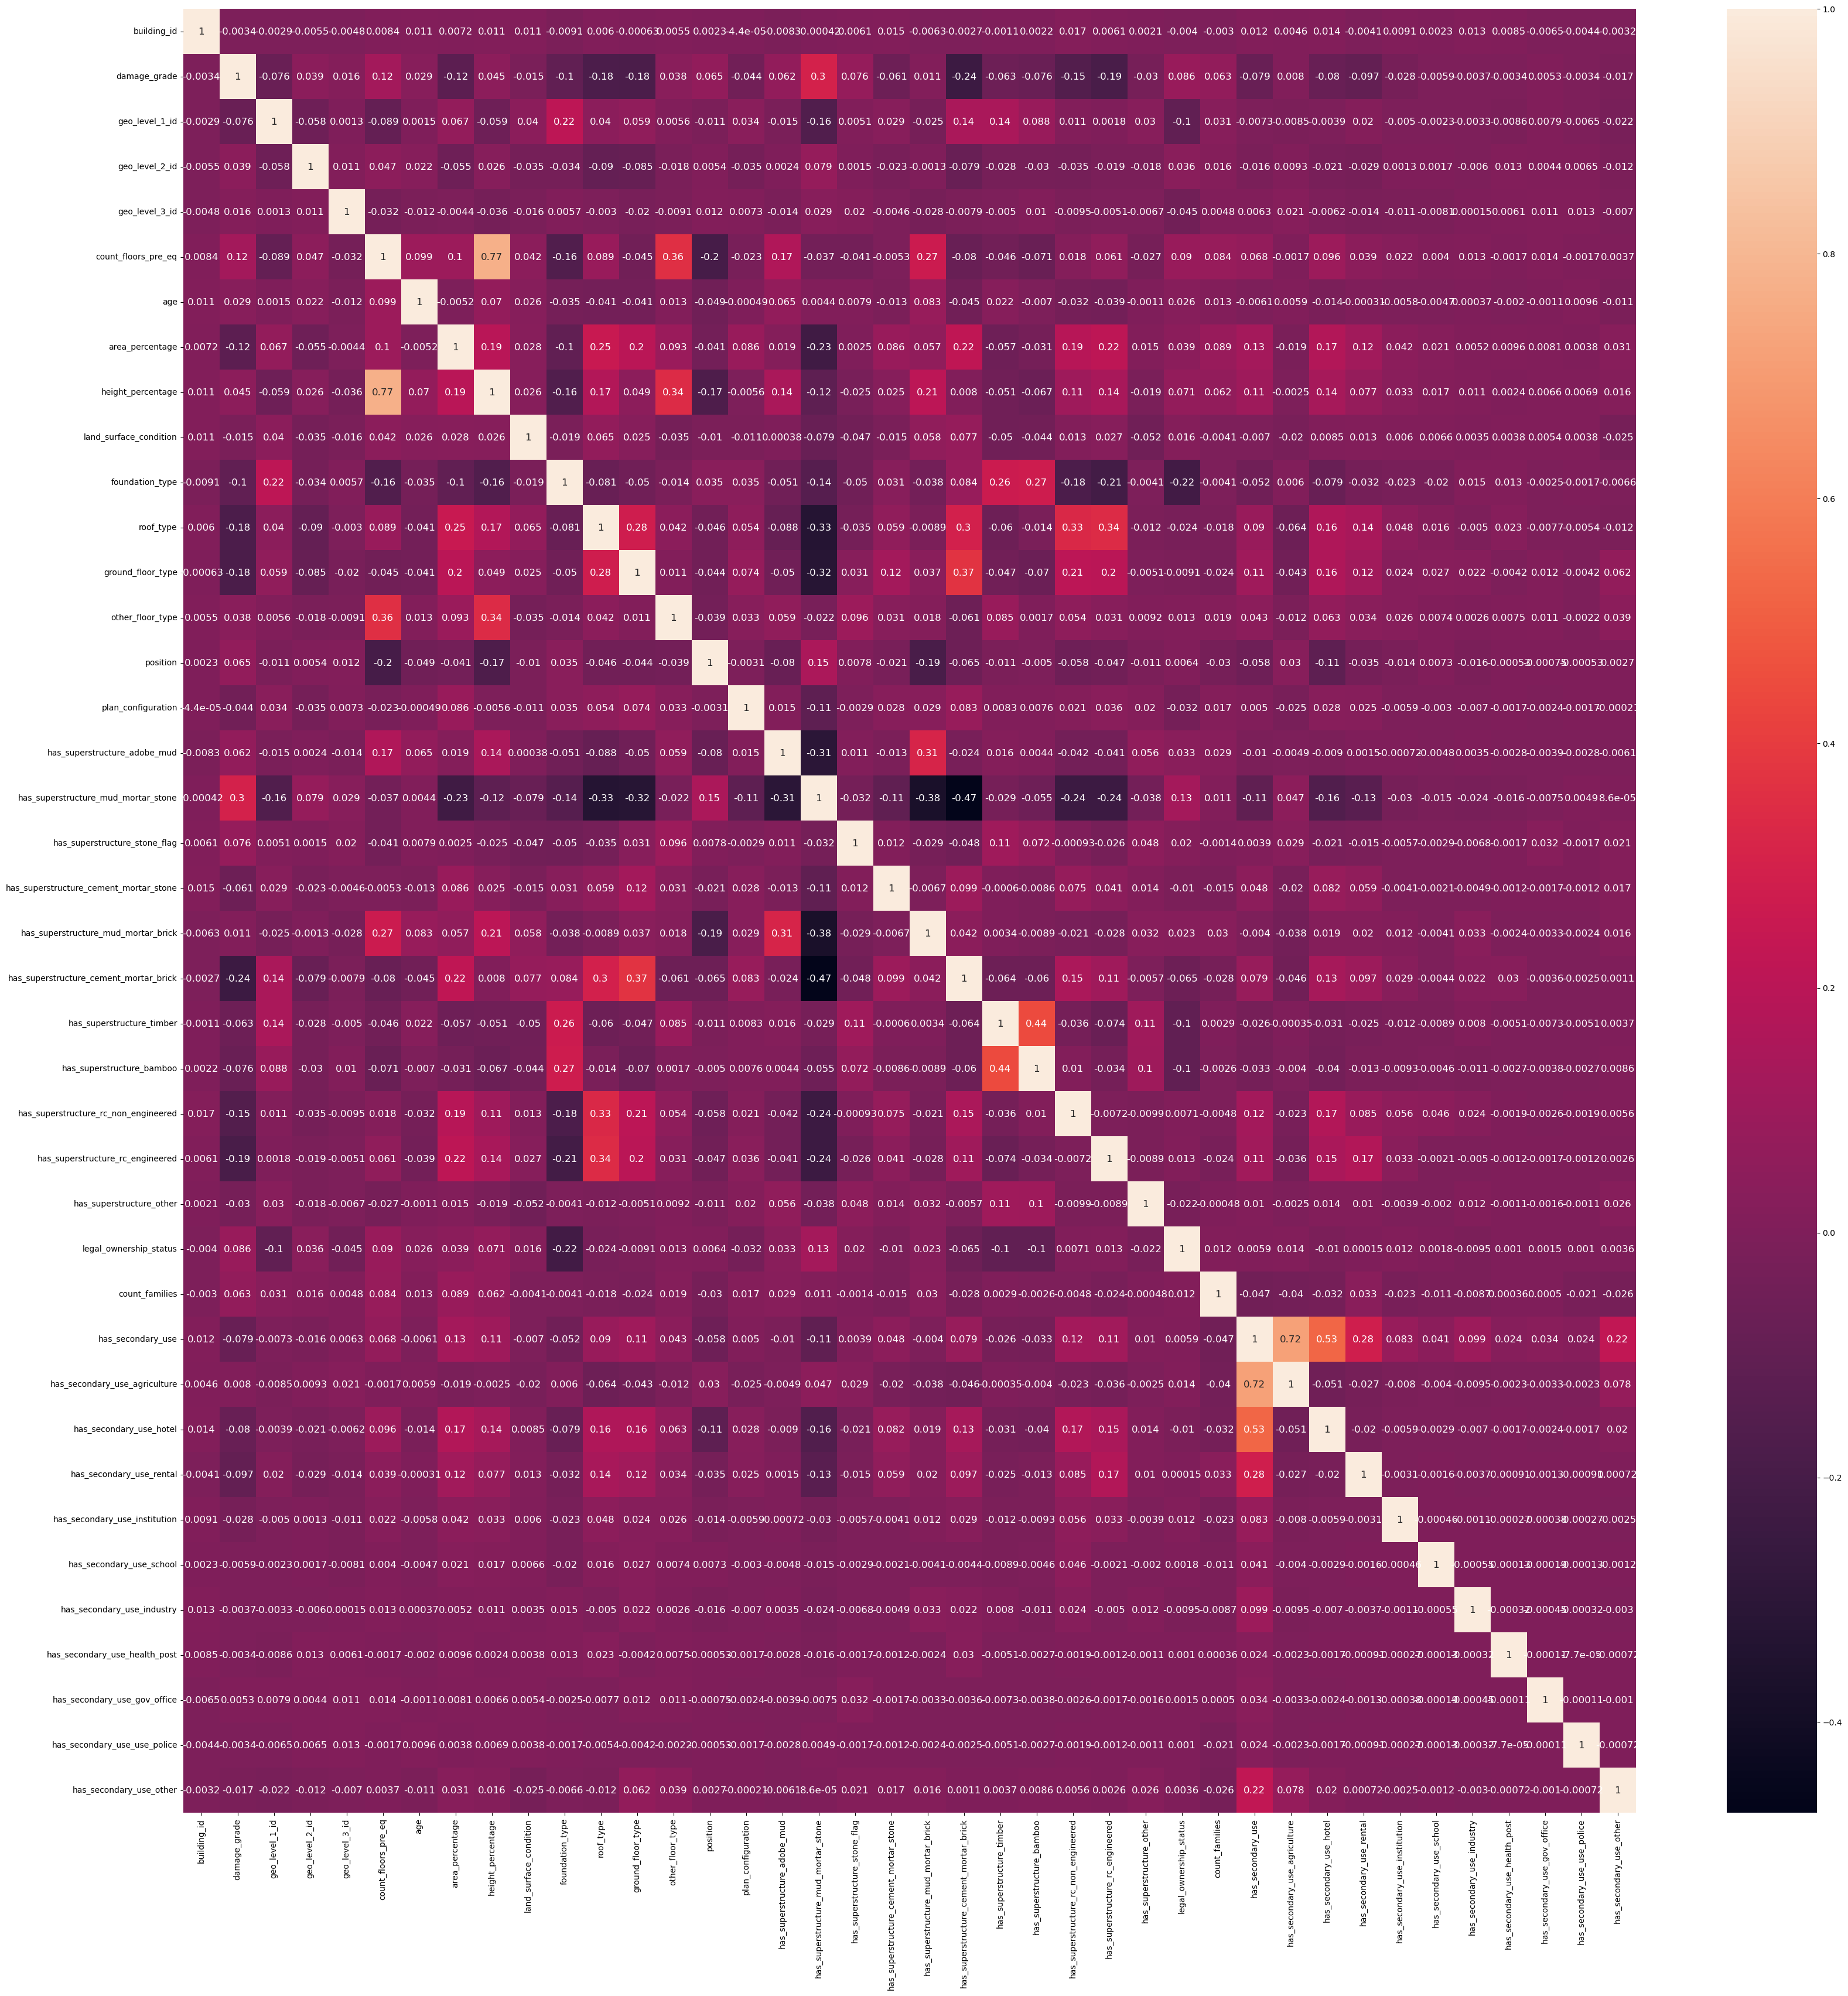

In [33]:
# Calcular la matriz de correlación
corr_matrix = df_final.corr()

plt.figure(figsize=(40,40))
sns.heatmap(corr_matrix, annot=True, annot_kws={'fontsize': 12})

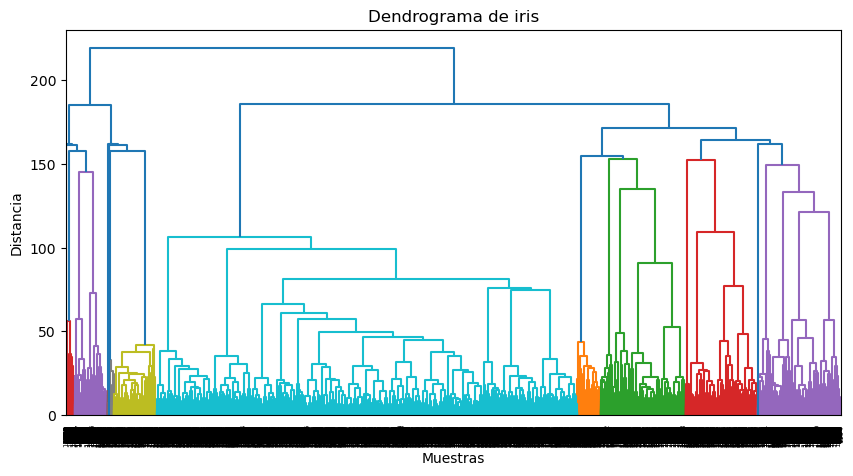

In [34]:
# Cargamos el dataset y lo preprocesamos
iris = df_final
X = df_final.drop(['damage_grade'], axis=1)
Y = df_final['damage_grade']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculamos la matriz de enlace
Z = linkage(X_scaled, method='ward')

# Creamos el dendrograma
plt.figure(figsize=(10, 5))
plt.title('Dendrograma')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
dendrogram(Z)
plt.show()

Tambien vamos a preparar los datos de "test_value" para poder hacer las devidas comprovaciones antes de subirlo a la competición.

In [35]:
# vamos a signar un valor numerico a cada letra de cada columna
test_value['legal_ownership_status'].replace(['a','r','v','w'], [1,2,3,4], inplace=True)
test_value['land_surface_condition'].replace(['n','o','t'],[1,2,3], inplace=True)
test_value['foundation_type'].replace(['h','i','r','u','w'],[1,2,3,4,5], inplace=True)
test_value['roof_type'].replace(['n','q','x'],[1,2,3], inplace=True)
test_value['ground_floor_type'].replace(['f','m','v','x','z'],[1,2,3,4,5], inplace=True)
test_value['other_floor_type'].replace(['j','q','s','x'],[1,2,3,4], inplace=True)
test_value['position'].replace(['j','o','s','t'],[1,2,3,4], inplace=True)
test_value['plan_configuration'].replace(['a','c','d','f','m','n','o','q','s','u'],[0,1,2,3,4,5,6,7,8,9], inplace=True)

# Preproceso de entrenamiento
1. Como en todo proceso de aprendizaje supervisado dividimos nuestros datos en entrenamiento y test.

In [36]:
# Dividimos los datos de entrenamiento
X = df_final.drop(['damage_grade'], axis=1)
Y = df_final['damage_grade']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

Escalamos los datos para que todos tengan el mismo peso

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Model Regresión Logística con RamdomSearch
En este modelo vamos a utilizar una "LogisticRegression" con una hiperparametrizacíon de tipo "RandomizedSearchCV".
La configuracíon y los parametros propuestos despues de probar mucho y algunos que me dijio ChatGP3 que podian mejorar la predicción en este modelo de clasificación.

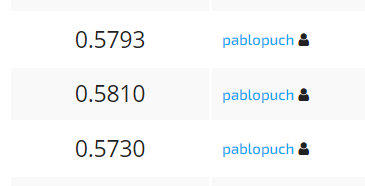

In [39]:
# creamos una funcíon para eliminar el archivo

def borrar_archivo(nombre_archivo):
    if os.path.exists(nombre_archivo):
        os.remove(nombre_archivo) # elimino la predición anterior para no confundir de fichero
        print(f"Archivo {nombre_archivo} eliminado.")
    else:
        print(f"El archivo {nombre_archivo} no existe.")

borrar_archivo("LogisticRegression\Richters_Results.csv")

Archivo LogisticRegression\Richters_Results.csv eliminado.


In [40]:
# Definir los hiperparámetros a optimizar
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1]
}

# realidamos la CrossValidation
cv = TimeSeriesSplit()

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(), 
    param_distributions=param_dist, 
    n_iter=10, 
    n_jobs=-1, 
    cv=5,
)

# Ajustar el modelo con los mejores hiperparámetros encontrados
model = random_search.fit(x_train, y_train)

# Obtener el modelo ajustado con los mejores hiperparámetros
best_model = model.best_estimator_

# Obtener los coeficientes del modelo ajustado
best_model.coef_

array([[ 8.04424351e-03,  1.22981361e-01,  2.75419343e-03,
         1.09485877e-02, -1.35899282e-01,  7.62820989e-03,
         3.28354249e-02, -8.14715258e-02,  6.74445985e-02,
         9.54227759e-02, -7.21596773e-04,  1.03725562e-01,
        -7.84942450e-04, -9.51467869e-02,  9.88092624e-03,
        -3.45274781e-01, -5.71358022e-01, -2.28361838e-01,
        -1.29326787e-02, -2.32977632e-01,  4.73518197e-02,
         1.04822051e-01, -1.60167776e-02,  1.34127188e-01,
         2.03049411e-01,  5.75680359e-02, -3.96554985e-02,
        -1.95811804e-01,  2.29015255e+00, -1.88874915e+00,
        -1.30030950e+00, -6.92547445e-01, -6.44943218e-02,
        -1.48255700e-01, -1.83914569e-01, -1.23523416e-01,
        -1.05364987e-01,  0.00000000e+00, -4.76091300e-01],
       [ 5.84957131e-03, -1.51404885e-01,  1.00149399e-02,
        -2.58423076e-02, -9.83292349e-03,  2.12516485e-03,
         2.37220496e-02,  3.70577816e-02, -4.65817418e-02,
         6.82467722e-02, -1.12697421e-03, -4.70810240e-

Mostramos la predicción que nos ha proporcionado el modelo

In [41]:
Y_pred = model.predict(test_value)

In [42]:
var = pd.read_csv('csv/submission_format.csv')
var['damage_grade'] = Y_pred.astype(int)
var.to_csv('LogisticRegression/Richters_Results.csv', index=False)

Realizamos una predicción con nuestros datos de test para ver que porcentaje que nos a dado.

In [43]:
y_pred_mi = model.predict(x_test)

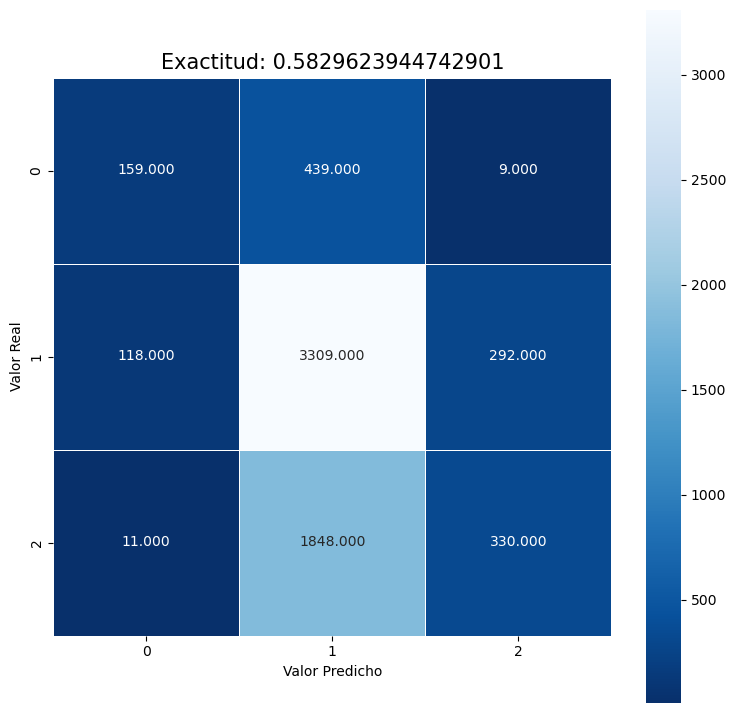

In [44]:
score = f1_score(y_test, y_pred_mi, average='micro')
cm = confusion_matrix(y_test, y_pred_mi, labels=model.classes_)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Valor Real');
plt.xlabel('Valor Predicho');
all_sample_title = 'Exactitud: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Model SVM (Máquinas de Vectores de Soporte) con RamdomSearch

En este modelo vamos a utilizar una "SVM" (Máquinas de Vectores de Soporte) con una hiperparametrizacíon de tipo "RandomizedSearchCV".
La configuracíon y los parametros propuestos despues de probar mucho combinacíones y de leer la libreria del sobre el modelo esta fue la configuraión aportada.

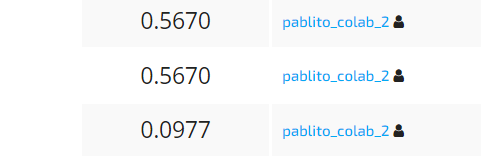

In [45]:
# creamos una funcíon para eliminar el archivo

def borrar_archivo(nombre_archivo):
    if os.path.exists(nombre_archivo):
        os.remove(nombre_archivo) # elimino la predición anterior para no confundir de fichero
        print(f"Archivo {nombre_archivo} eliminado.")
    else:
        print(f"El archivo {nombre_archivo} no existe.")

borrar_archivo("SVM\Richters_Results.csv")

El archivo SVM\Richters_Results.csv no existe.


In [46]:

param_dist = {
    'C': [1,2,3,4,5,6,7,8,9,10],
    'gamma': ['scale','auto'],
    'kernel': ['rbf','linear','sigmoid']
}

cv = TimeSeriesSplit()

random_search = RandomizedSearchCV(
    estimator=SVC(), 
    param_distributions=param_dist, 
    n_jobs=-1, 
    cv=5
)


# crear un clasificador SVM
svc = SVC()

model = random_search.fit(x_train, y_train)

# Obtener el modelo ajustado con los mejores hiperparámetros
best_model = model.best_estimator_

Mostramos la predicción que nos ha proporcionado el modelo

In [ ]:
Y_pred = model.predict(test_value)

In [ ]:
var = pd.read_csv('csv/submission_format.csv')
var['damage_grade'] = Y_pred.astype(int)
var.to_csv('SVM/Richters_Results.csv', index=False)

Realizamos una predicción con nuestros datos de test para ver que porcentaje que nos a dado.

In [ ]:
y_pred_svm = model.predict(x_test)

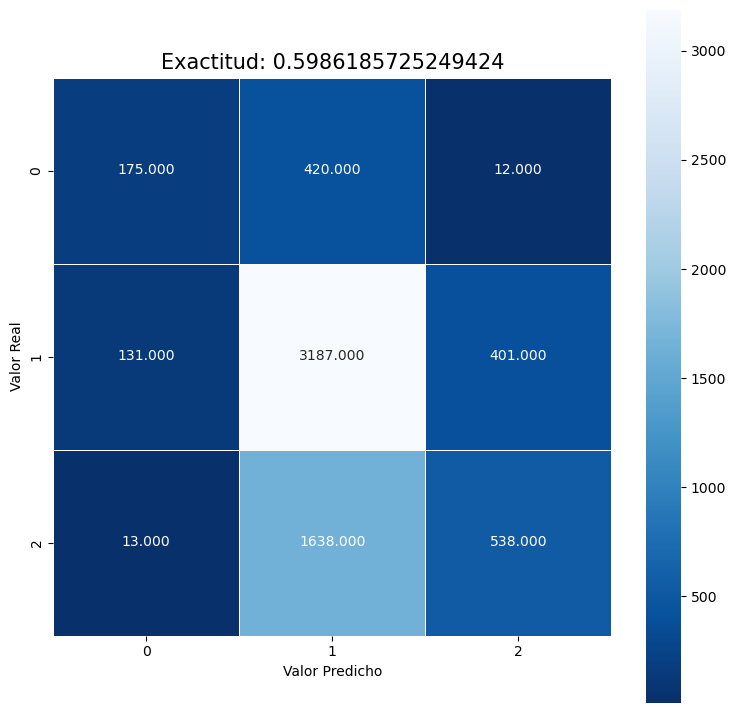

In [ ]:
score = f1_score(y_test, y_pred_svm, average='micro')
cm = confusion_matrix(y_test, y_pred_svm, labels=model.classes_)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Valor Real');
plt.xlabel('Valor Predicho');
all_sample_title = 'Exactitud: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:44<00:00,  1.54s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.68               0.56    None      0.67   
BaggingClassifier                  0.64               0.55    None      0.63   
RandomForestClassifier             0.66               0.54    None      0.65   
ExtraTreesClassifier               0.65               0.53    None      0.63   
BernoulliNB                        0.56               0.53    None      0.55   
NearestCentroid                    0.48               0.53    None      0.47   
QuadraticDiscriminantAnalysis      0.42               0.53    None      0.34   
GaussianNB                         0.41               0.52    None      0.34   
AdaBoostClassifier                 0.65               0.52    None      0.63   
DecisionTreeClassifier             0.58               0.52    None      0.58   
LinearDiscriminantAnalysis         0.58 

## Cuaderno de bitacora de Drivendata

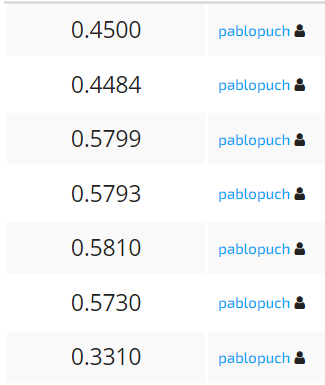

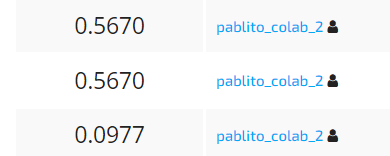